# Neural Network

In this notebook, we will be using PyTorch to build several simple neural networks to solve some of the problems tat we have seen in the previous notebooks.

In [4]:
import os, sys

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

import numpy as np
import torch
from sklearn.datasets import load_diabetes
from tools.utilities import plot_regression, plot_classification

%reload_ext autoreload

In [5]:
def train(model, X, y, loss_fn, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        # Forward pass
        y_pred = model(X)
        loss = loss_fn(y_pred, y)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if epoch % (epochs // 10) == 0:
            print(f"Epoch: {epoch}, Loss: {loss.item()}")

## Regression

In [6]:
X, y = load_diabetes(return_X_y=True)

In [7]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initialize a 2-layer neural network for regression.
        No activation function is used in the output layer.

        Args:
            input_size (num_features: int)
            hidden_size (int)
            output_size (int)
        """
        super(LinearRegressionModel, self).__init__()
        self.linear1 = torch.nn.Linear(input_size, hidden_size)
        self.linear2 = torch.nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        return x

We can see we are able to pass data through the model. Even though the output data is just random.

LinearRegressionModel(
  (linear1): Linear(in_features=10, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=1, bias=True)
)


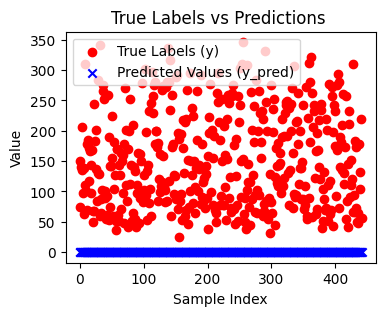

/Users/henry/Git/ml-algorithms/.venv/lib/python3.12/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([442])) that is different to the input size (torch.Size([442, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0, Loss: 29084.193359375
Epoch: 100, Loss: 6368.67138671875
Epoch: 200, Loss: 5929.95703125
Epoch: 300, Loss: 5929.953125
Epoch: 400, Loss: 5929.9501953125
Epoch: 500, Loss: 5929.9482421875
Epoch: 600, Loss: 5929.947265625
Epoch: 700, Loss: 5929.9453125
Epoch: 800, Loss: 5929.94384765625
Epoch: 900, Loss: 5929.9423828125


In [8]:
model = LinearRegressionModel(
    input_size=10, hidden_size=256, output_size=1
)  # Note that the input_size should be equal to the num_features
print(model)

model(torch.Tensor(X)[:10]), torch.Tensor(y)[:10]
plot_regression(y=y, y_pred=model(torch.Tensor(X)).detach().numpy())

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

train(model, torch.Tensor(X), torch.Tensor(y), loss_fn, optimizer, epochs=1000)

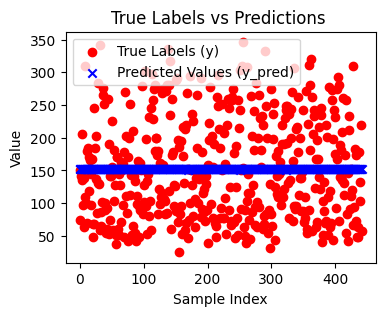

In [9]:
plot_regression(y=y, y_pred=model(torch.Tensor(X)).detach().numpy())

Let's now try to add some non-linear activation functions to the model.

In [10]:
class NonLinearRegressionModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initialize a 2-layer neural network for regression.
        No activation function is used in the output layer.

        Args:
            input_size (num_features: int)
            hidden_size (int)
            output_size (int)
        """
        super(NonLinearRegressionModel, self).__init__()
        self.linear1 = torch.nn.Linear(input_size, hidden_size)
        self.linear2 = torch.nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.nn.functional.relu(self.linear1(x))
        x = self.linear2(x)
        return x

In [11]:
model = NonLinearRegressionModel(
    input_size=10, hidden_size=256, output_size=1
)  # Note that the input_size should be equal to the num_features
total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
print(model)
train(model, torch.Tensor(X), torch.Tensor(y), loss_fn, optimizer, epochs=3000)

Number of parameters: 3073
NonLinearRegressionModel(
  (linear1): Linear(in_features=10, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=1, bias=True)
)
Epoch: 0, Loss: 29108.32421875


KeyboardInterrupt: 

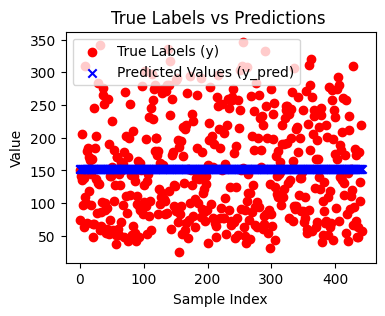

In [184]:
plot_regression(y=y, y_pred=model(torch.Tensor(X)).detach().numpy())

## Classification

We will use the MNIST dataset to do multi-class classification

In [1]:
from torchvision import datasets

ds = datasets.mnist.MNIST(root="./data", train=True, download=True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 12.0MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 367kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.61MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.73MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



We will create a simple 2-layer neural network that can classify images into 10 classes.

In [6]:
class Classifier(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Classifier, self).__init__()
        self.linear1 = torch.nn.Linear(input_size, hidden_size)
        self.linear2 = torch.nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.nn.functional.relu(self.linear1(x))
        x = self.linear2(x)
        return x

NameError: name 'torch' is not defined

We first do some preprocessing on the images to make convergence faster.

In [22]:
X = ds.data.reshape(-1, 28 * 28).float() / 255.0  # normalize the image
y = ds.targets
print(X.shape, y.shape)

torch.Size([60000, 784]) torch.Size([60000])


We train the model and compare the multiclass classification accuracy.

In [38]:
model = Classifier(
    input_size=ds.data.shape[-1] * ds.data.shape[-1], hidden_size=128, output_size=10
)
print(model)
total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
train(model, X, y, loss_fn, optimizer, epochs=500)

y_pred = model(X).argmax(dim=1)
# compare y_pred and y on the classification accuracy
print(f"Accuracy: {(sum(y_pred == y) / X.shape[0]).numpy()}")

Classifier(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=10, bias=True)
)
Number of parameters: 101770
Epoch: 0, Loss: 2.3098723888397217
Epoch: 50, Loss: 0.4228391945362091
Epoch: 100, Loss: 0.28520241379737854
Epoch: 150, Loss: 0.22855660319328308
Epoch: 200, Loss: 0.19079674780368805
Epoch: 250, Loss: 0.16272518038749695
Epoch: 300, Loss: 0.1400536447763443
Epoch: 350, Loss: 0.12103009968996048
Epoch: 400, Loss: 0.1050495058298111
Epoch: 450, Loss: 0.0915927067399025
Accuracy: 0.9782000184059143
